<a href="https://colab.research.google.com/github/Jaranhee/2025-1-myclass-BDA/blob/main/inclass/09w_B_wed_0430_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [6]:
df.dropna(subset = ['score'])  # score 결측치 제거

KeyError: ['score']

In [7]:
df_nomiss = df.dropna(subset=['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [9]:
df_nomiss['score']+1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [10]:
df_nomiss = df.dropna(subset=['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [11]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [12]:
df.score.mean()

np.float64(4.0)

In [13]:
df['score'].sum()

np.float64(16.0)

In [22]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [26]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [27]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [28]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [29]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [30]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [32]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [33]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [34]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [35]:
df.dropna(thresh=1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [36]:
df.dropna(subset = ['name','toy',])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [37]:
df.dropna(subset = ['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [38]:
df.dropna(subset = ['born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


##빈 데이터프레임 확인 방법 df.empty

In [41]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [43]:
df1.empty

True

In [42]:
df2 = pd.DataFrame(columns = ['col1', 'col2', 'col3'])
df2

,col1,col2,col3


In [44]:
df2.empty

True

In [48]:
df3 = pd.DataFrame(index = ['row1', 'row2', 'row3'], columns = ['col1', 'col2', 'col3'])
df3

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [49]:
df3.empty

False

In [53]:
df4 = pd.DataFrame(np.nan, index = ['row1', 'row2', 'row3'], columns = ['col1', 'col2', 'col3'])
df4

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [51]:
df4.empty

False

In [54]:
df5 = pd.DataFrame(2, index = ['row1', 'row2', 'row3'], columns = ['col1', 'col2', 'col3'])
df5

,col1,col2,col3
row1,2,2,2
row2,2,2,2
row3,2,2,2


In [55]:
df5.empty

False

##결측 값 대체

In [56]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.31 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [61]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2,7,14],['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [62]:
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


### 결측값 채워넣기 fillna()

In [63]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [64]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [65]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,55.235294,86,78
7,8,2,55.235294,78,25
14,15,4,55.235294,56,78


In [67]:
pd.set_option('display.precision',2)
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [68]:
exam.math.isna().sum()

np.int64(0)

In [69]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [70]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [71]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [72]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [73]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [74]:
df = pd.DataFrame([1])
df

,0
0,1


In [75]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [76]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [77]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [80]:
df1 = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df1['x2'] = np.where(df1['x1'] == 1, 'a', None)
df1

,x1,x2
0,1,a
1,1,a
2,2,None
3,2,None


In [81]:
df1 = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df1['x2'] = np.where(df1['x1'] == 1, 'a', 'etc')
df1

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [91]:
df['x2'] = np.where(df['x1'] == 1, 'a', '10')
df

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [92]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [93]:
df2 = df.fillna(10)
df2

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [94]:
df

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [96]:
type(df2.loc[2, 'x2'])

str

##이상값(outlier) 알아보기

In [98]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
39,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
129,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv
113,hyundai,sonata,2.5,1999,6,manual(m5),f,18,26,r,midsize
198,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv


In [99]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [102]:
%config InlineBackend.figure_format = 'retina'

<Axes: ylabel='hwy'>

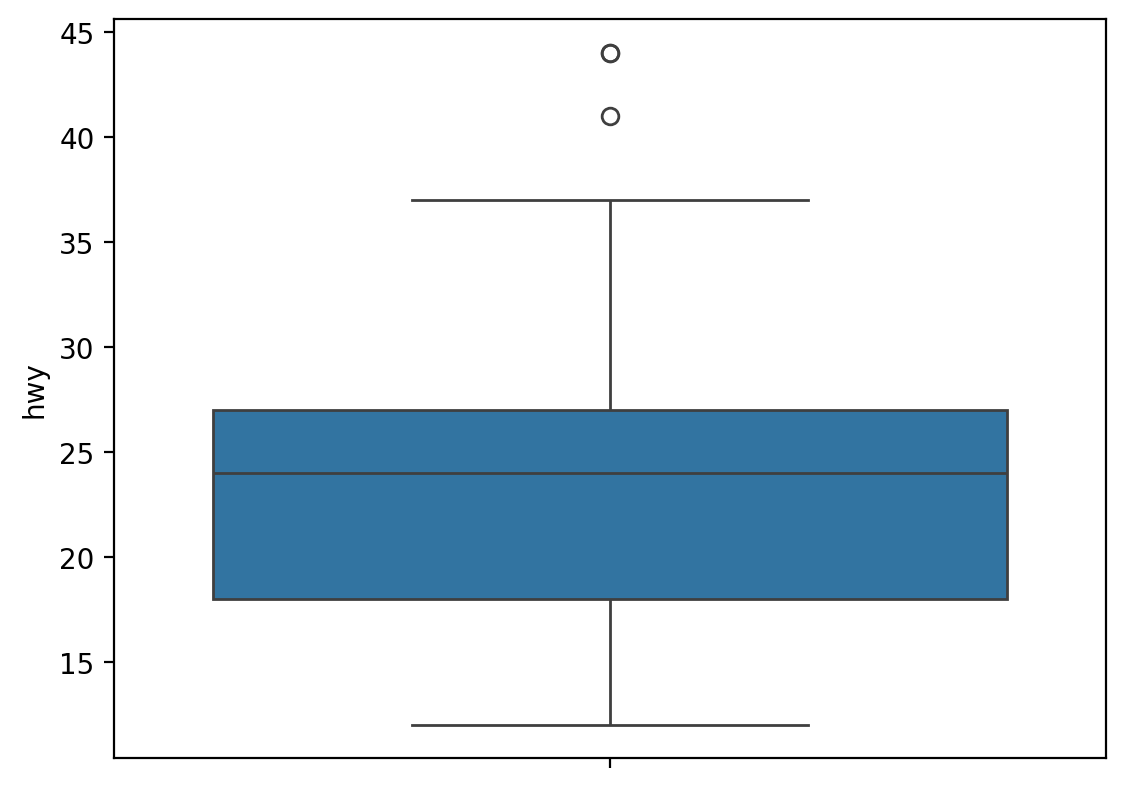

In [103]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

박스플롯 시험에 나옴

In [104]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [105]:
s.quantile()

np.float64(3.0)

In [106]:
s.quantile(.5)

np.float64(3.0)

In [107]:
s.quantile([.1,.2,.25,.5,.75])

,0
0.10,1.4
0.20,1.8
0.25,2.0
0.50,3.0
0.75,4.0


In [108]:
p25,p50,p75 = mpg.hwy.quantile([.25,.5,.75])

In [109]:
p25

18.0

In [110]:
p50

24.0

In [111]:
p75

27.0